# Marketing campaign analysis

I took a dataset regarding the various information regarding a marketing campaign analysis

In [126]:
import pandas.io.sql as pds
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [105]:
# read the data from the file
filepath = 'marketing_campaign.csv'
data = pd.read_csv(filepath, sep='\t')

data.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

## Attributes

for each of of the main attributes I want to inspect I want to print the possible range of values to have a better understanding of what I have to deal with

In [16]:
data.Year_Birth.unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940], dtype=int64)

In [17]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [18]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
data.Income.unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

## Data exploration

I start plotting some information regarding the data I have to study

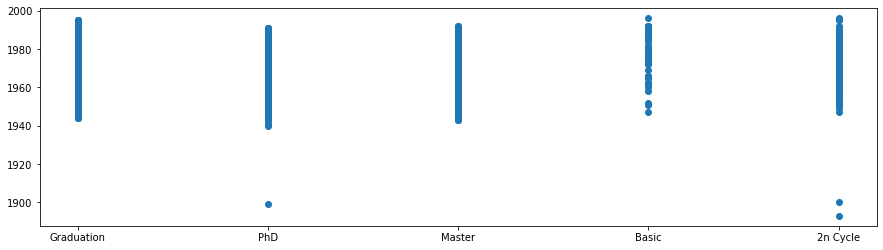

In [22]:
# show initial plot
plt.figure(figsize=(15, 4))
plt.plot(data.Education, data.Year_Birth, ls='', marker='o')

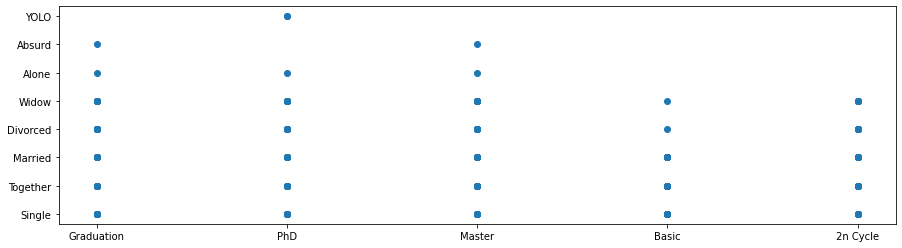

In [23]:
# show initial plot
plt.figure(figsize=(15, 4))
plt.plot(data.Education, data.Marital_Status, ls='', marker='o')

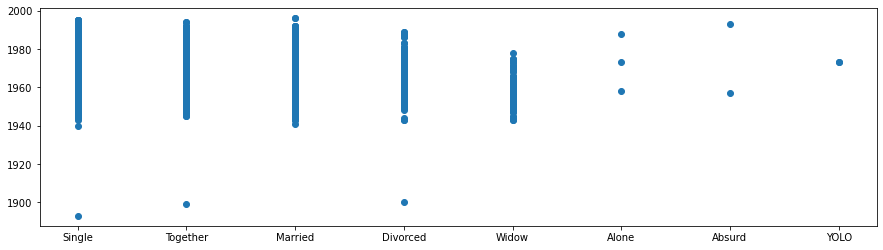

In [24]:
# show initial plot
plt.figure(figsize=(15, 4))
plt.plot(data.Marital_Status, data.Year_Birth, ls='', marker='o')

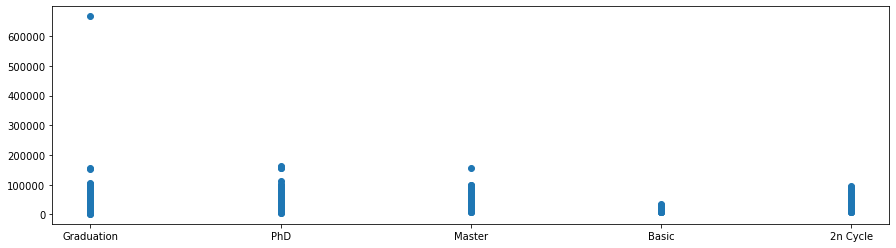

In [25]:
# show initial plot
plt.figure(figsize=(15, 4))
plt.plot(data.Education, data.Income, ls='', marker='o')

C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

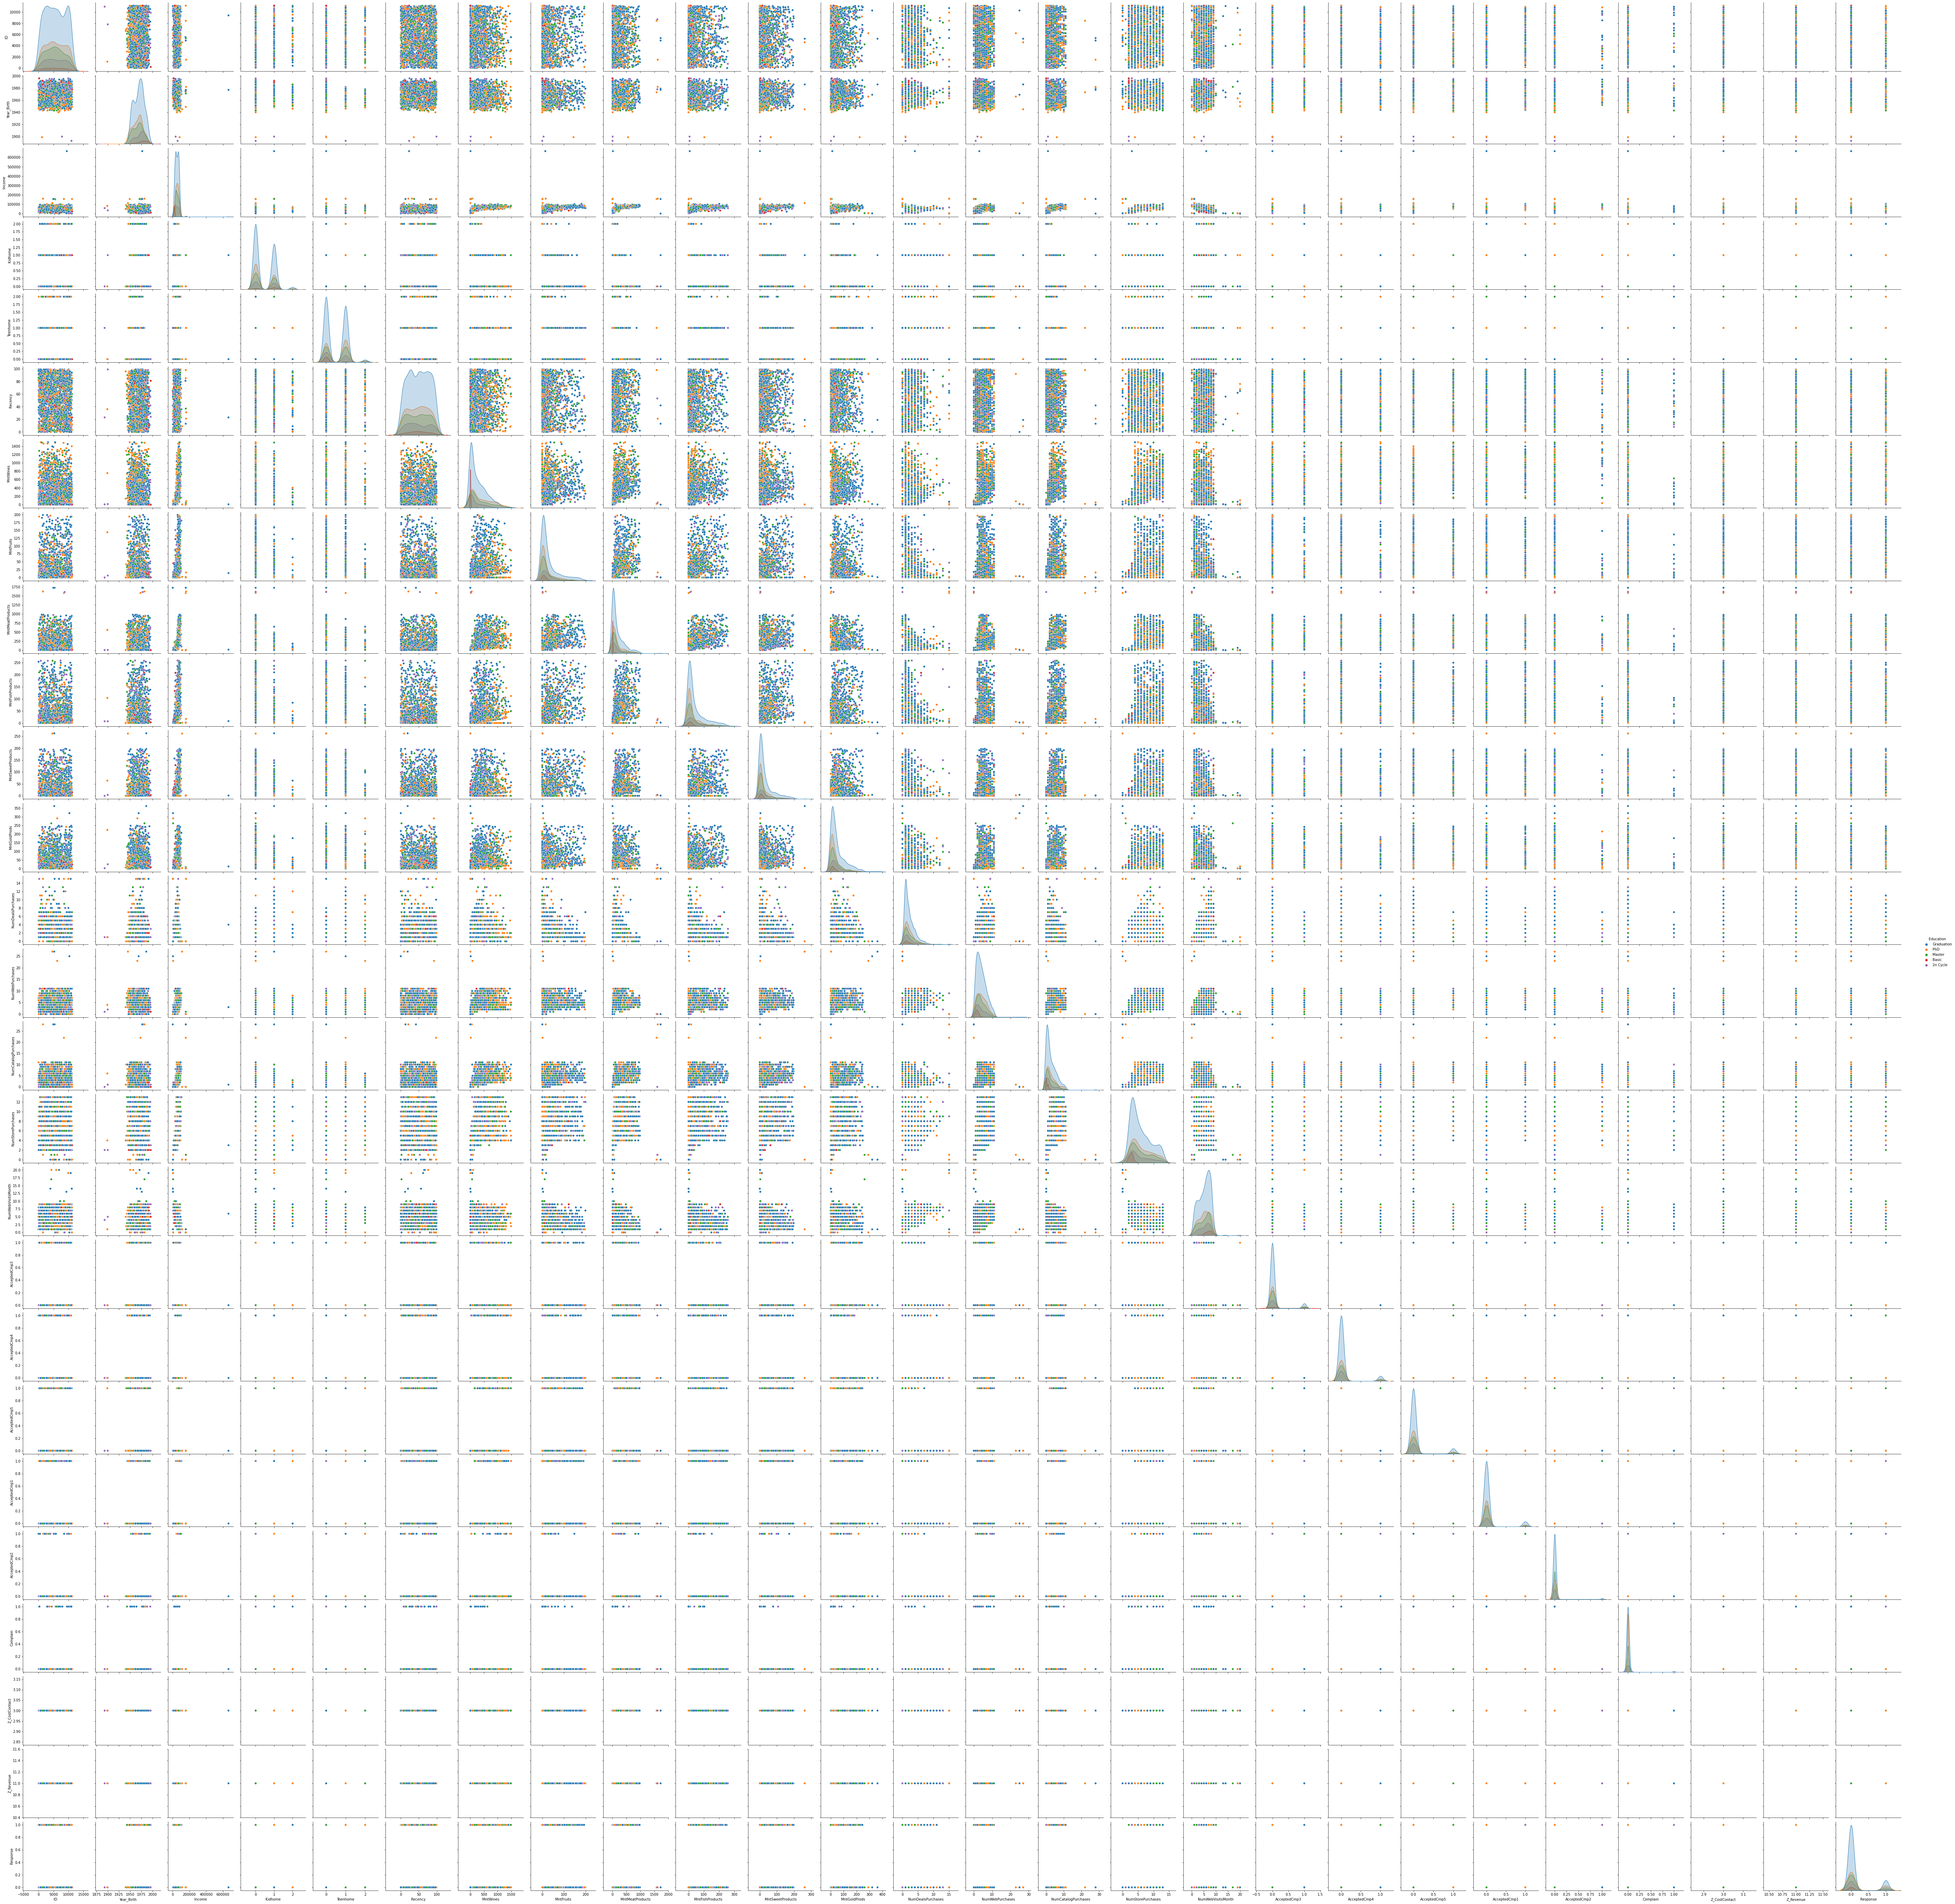

In [30]:
sns.pairplot(data, hue='Education', height=3)

### Data cleaning

Let's see the information for that person with the weird income and clean that

In [34]:
data.max()

666666.0

In [38]:
data.loc[data['Income']==666666.0, 'Income'] = 200000.0

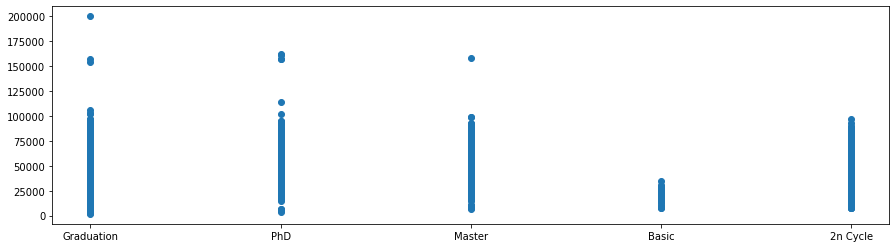

In [40]:
# show initial plot
plt.figure(figsize=(15, 4))
plt.plot(data.Education, data.Income, ls='', marker='o')

### Feature engineering

Let's check first possible information with a single distplot

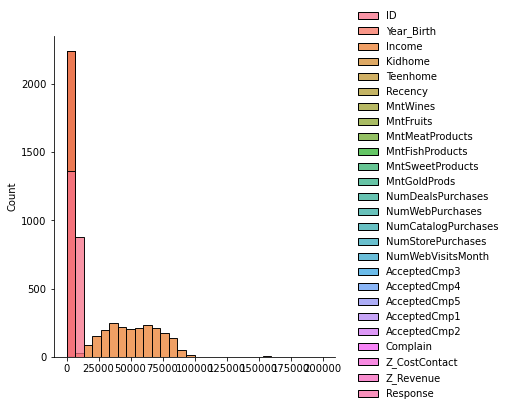

In [43]:
sns.displot(data, bins=30)

<AxesSubplot:ylabel='Count'>

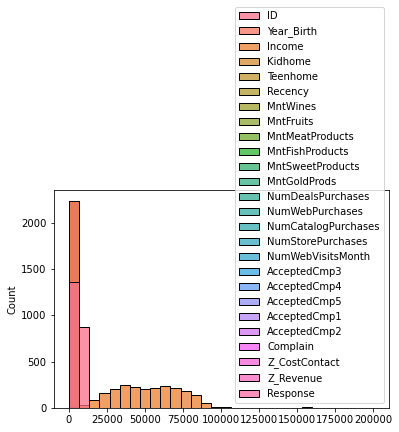

In [44]:
sns.histplot(data, bins=30)

In [106]:
df = pd.DataFrame(data)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [109]:
pd.get_dummies(df['Education'], prefix='Education', drop_first=True)

df = pd.concat([df,pd.get_dummies(df['Education'], prefix='Education')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['Education'],axis=1, inplace=True)

In [111]:
pd.get_dummies(df['Marital_Status'], prefix='Marital_Status', drop_first=True)

df = pd.concat([df,pd.get_dummies(df['Marital_Status'], prefix='Marital_Status')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['Marital_Status'],axis=1, inplace=True)

In [112]:
pd.get_dummies(df['Dt_Customer'], prefix='Dt_Customer', drop_first=True)

df = pd.concat([df,pd.get_dummies(df['Dt_Customer'], prefix='Dt_Customer')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['Dt_Customer'],axis=1, inplace=True)

In [143]:
df = df.reset_index()

In [161]:
df = df.fillna(0)
df

index     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0         0   5524        1957  58138.0        0         0       58       635   
1         1   2174        1954  46344.0        1         1       38        11   
2         2   4141        1965  71613.0        0         0       26       426   
3         3   6182        1984  26646.0        1         0       26        11   
4         4   5324        1981  58293.0        1         0       94       173   
...     ...    ...         ...      ...      ...       ...      ...       ...   
2235   2235  10870        1967  61223.0        0         1       46       709   
2236   2236   4001        1946  64014.0        2         1       56       406   
2237   2237   7270        1981  56981.0        0         0       91       908   
2238   2238   8235        1956  69245.0        0         1        8       428   
2239   2239   9405        1954  52869.0        1         1       40        84   

      MntFruits  MntMeatProducts  ...  Dt_Customer_31-03-2014  \
0            88              546  ...                       0   
1             1                6  ...                       0   
2            49              127  ...                       0   
3             4               20  ...                       0   
4            43              118  ...                       0   
...         ...              ...  ...                     ...   
2235         43              182  ...                       0   
2236          0               30  ...                       0   
2237         48              217  ...                       0   
2238         30              214  ...                       0   
2239          3               61  ...                       0   

      Dt_Customer_31-05-2013  Dt_Customer_31-05-2014  Dt_Customer_31-07-2012  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
2235                       0                       0                       0   
2236                       0                       0                       0   
2237                       0                       0                       0   
2238                       0                       0                       0   
2239                       0                       0                       0   

      Dt_Customer_31-07-2013  Dt_Customer_31-08-2012  Dt_Customer_31-08-2013  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
2235                       0                       0                       0   
2236                       0                       0                       0   
2237                       0                       0                       0   
2238                       0                       0                       0   
2239                       0                       0                       0   

      Dt_Customer_31-10-2012  Dt_Customer_31-12-2012  Dt_Customer_31-12-2013  
0                          0                       0                       0  
1                          0                       0                       0  
2                          0                       0                       0  
3             

In [162]:
df.isnull().sum().sum()

0

## Linear regression models

I can now make three different assumptions on regression models to then prove them.

In [163]:
y_col = "Income"

X = df.drop(y_col, axis=1)
y = df[y_col]

In [164]:
X

index     ID  Year_Birth  Kidhome  Teenhome  Recency  MntWines  \
0         0   5524        1957        0         0       58       635   
1         1   2174        1954        1         1       38        11   
2         2   4141        1965        0         0       26       426   
3         3   6182        1984        1         0       26        11   
4         4   5324        1981        1         0       94       173   
...     ...    ...         ...      ...       ...      ...       ...   
2235   2235  10870        1967        0         1       46       709   
2236   2236   4001        1946        2         1       56       406   
2237   2237   7270        1981        0         0       91       908   
2238   2238   8235        1956        0         1        8       428   
2239   2239   9405        1954        1         1       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  \
0            88              546              172  ...   
1             1                6                2  ...   
2            49              127              111  ...   
3             4               20               10  ...   
4            43              118               46  ...   
...         ...              ...              ...  ...   
2235         43              182               42  ...   
2236          0               30                0  ...   
2237         48              217               32  ...   
2238         30              214               80  ...   
2239          3               61                2  ...   

      Dt_Customer_31-03-2014  Dt_Customer_31-05-2013  Dt_Customer_31-05-2014  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
2235                       0                       0                       0   
2236                       0                       0                       0   
2237                       0                       0                       0   
2238                       0                       0                       0   
2239                       0                       0                       0   

      Dt_Customer_31-07-2012  Dt_Customer_31-07-2013  Dt_Customer_31-08-2012  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
2235                       0                       0                       0   
2236                       0                       0                       0   
2237                       0                       0                       0   
2238                       0                       0                       0   
2239                       0                       0                       0   

      Dt_Customer_31-08-2013  Dt_Customer_31-10-2012  Dt_Customer_31-12-2012  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...              

In [165]:
y

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [98]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# labelencoder = LabelEncoder()

# X.loc[:, 'Education'] = labelencoder.fit_transform(X.loc[:, 'Education'])
# X.loc[:, 'Marital_Status'] = labelencoder.fit_transform(X.loc[:, 'Marital_Status'])
# X.loc[:, 'Dt_Customer'] = labelencoder.fit_transform(X.loc[:, 'Dt_Customer'])

# onehotencoder = OneHotEncoder()
# X = onehotencoder.fit_transform(X).toarray()

In [99]:
# X

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [122]:
X.isnull()

ID  Year_Birth  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     False       False    False     False    False     False      False   
1     False       False    False     False    False     False      False   
2     False       False    False     False    False     False      False   
3     False       False    False     False    False     False      False   
4     False       False    False     False    False     False      False   
...     ...         ...      ...       ...      ...       ...        ...   
2235  False       False    False     False    False     False      False   
2236  False       False    False     False    False     False      False   
2237  False       False    False     False    False     False      False   
2238  False       False    False     False    False     False      False   
2239  False       False    False     False    False     False      False   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0               False            False             False  ...   
1               False            False             False  ...   
2               False            False             False  ...   
3               False            False             False  ...   
4               False            False             False  ...   
...               ...              ...               ...  ...   
2235            False            False             False  ...   
2236            False            False             False  ...   
2237            False            False             False  ...   
2238            False            False             False  ...   
2239            False            False             False  ...   

      Dt_Customer_31-03-2014  Dt_Customer_31-05-2013  Dt_Customer_31-05-2014  \
0                      False                   False                   False   
1                      False                   False                   False   
2                      False                   False                   False   
3                      False                   False                   False   
4                      False                   False                   False   
...                      ...                     ...                     ...   
2235                   False                   False                   False   
2236                   False                   False                   False   
2237                   False                   False                   False   
2238                   False                   False                   False   
2239                   False                   False                   False   

      Dt_Customer_31-07-2012  Dt_Customer_31-07-2013  Dt_Customer_31-08-2012  \
0                      False                   False                   False   
1                      False                   False                   False   
2                      False                   False                   False   
3                      False                   False                   False   
4                      False                   False                   False   
...                      ...                     ...                     ...   
2235                   False                   False                   False   
2236                   False                   False                   False   
2237                   False                   False                   False   
2238                   False                   False                   False   
2239                   False                   False                   False   

      Dt_Customer_31-08-2013  Dt_Customer_31-10-2012  Dt_Customer_31-12-2012  \
0                      False                   False                   False   
1                      False                   False                   False   
2                      False                   False                   False   
3                      False                   False                   Fa

In [166]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X)

In [167]:
# np.isnan(X_ss)
# np.all(np.isnan(X_ss))
# np.all(np.isfinite(X_ss))
np.isfinite(X_ss)
X_ss

array([[-1.73127774, -0.0209985 , -0.98534473, ..., -0.04729838,
        -0.02113357, -0.03662078],
       [-1.72973127, -1.05305783, -1.23573295, ..., -0.04729838,
        -0.02113357, -0.03662078],
       [-1.72818479, -0.44706956, -0.3176428 , ..., -0.04729838,
        -0.02113357, -0.03662078],
       ...,
       [ 1.72818479,  0.51690466,  1.01776106, ..., -0.04729838,
        -0.02113357, -0.03662078],
       [ 1.72973127,  0.81419936, -1.06880747, ..., -0.04729838,
        -0.02113357, -0.03662078],
       [ 1.73127774,  1.17464994, -1.23573295, ..., -0.04729838,
        -0.02113357, -0.03662078]])

In [168]:
X_ss.max()

47.31807265728392

In [169]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_) # coefficients now "on the same scale"

[ 3.09879797e+02  6.38284566e+01 -2.97189560e+02  2.51286151e+02
  2.51390306e+03 -9.70470256e+02  4.89810937e+03  1.56443555e+03
  2.90550568e+03  3.82948153e+02  5.53489466e+02 -8.95652598e+02
 -7.05733187e+02  2.34669580e+03  3.74422938e+03  1.35795303e+03
 -6.77708081e+03 -5.03293267e+02  2.03378377e+01  1.46018219e+03
  2.28118351e+02  3.16115356e+00  5.45095311e+01  5.62509826e+16
 -2.36461556e+16  2.42023908e+02  4.13035737e+16  2.20681565e+16
  7.19372176e+16  5.34276117e+16  5.93030493e+16  4.95626610e+14
  6.06880518e+14  5.05633015e+15  8.07747578e+15  6.80905009e+15
  7.26904935e+15  3.02331361e+15  4.95626610e+14 -3.34926568e+15
 -2.90119770e+15 -2.90119770e+15 -1.67575588e+15 -2.90119770e+15
 -5.01827832e+15 -3.74375544e+15 -2.90119770e+15 -2.90119770e+15
 -2.36934740e+15 -2.36934740e+15 -2.90119770e+15 -3.34926568e+15
 -3.74375544e+15 -1.67575588e+15 -2.90119770e+15 -3.74375544e+15
 -2.90119770e+15 -2.36934740e+15 -1.67575588e+15 -3.34926568e+15
 -3.74375544e+15 -5.01827

In [170]:
pd.DataFrame(zip(X.columns, lr2.coef_)).sort_values(by=1)

0             1
24                Z_Revenue -2.364616e+16
697  Dt_Customer_31-08-2012 -5.790711e+15
294  Dt_Customer_12-09-2012 -5.545428e+15
288  Dt_Customer_12-05-2014 -5.545428e+15
324  Dt_Customer_14-02-2013 -5.545428e+15
..                      ...           ...
26       Education_2n Cycle  4.130357e+16
29         Education_Master  5.342761e+16
23            Z_CostContact  5.625098e+16
30            Education_PhD  5.930305e+16
28     Education_Graduation  7.193722e+16

[702 rows x 2 columns]

### Lasso regression with and without scale

We will now use the Lasso Linear Regression

In [171]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [172]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)

In [173]:
X_pf_ss = s.fit_transform(X_pf)

In [174]:
from sklearn.model_selection import train_test_split

las = Lasso()
las.fit(X_pf_ss, y)
las.coef_ 

from sklearn.metrics import r2_score
r2_score(y,las.predict(X_pf_ss))

X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

# Decreasing regularization and ensuring convergence
las001 = Lasso(alpha = 0.001, max_iter=100000)
X_train_s = s.fit_transform(X_train)
las001.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = las001.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 0.001:", r2_score(y_pred, y_test))


lr = LinearRegression()
lr.fit(X_train_s, y_train)
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))



print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())

r2 score for alpha = 0.001: 0.3661671604544462
r2 score for Linear Regression: 0.10913406056965069
Magnitude of Lasso coefficients: 1003547.1721249411
Number of coeffients not equal to 0 for Lasso: 15335
Magnitude of Linear Regression coefficients: 514691.7673872624
Number of coeffients not equal to 0 for Linear Regression: 15954


In [177]:
from sklearn.linear_model import Ridge

# Decreasing regularization and ensuring convergence; I use the same alpha for Lasso
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
r.coef_
r2_score(y_pred_r, y_test)

0.10979764211553444

In [176]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

514250.0803133368
1003547.1721249411
15848
15335
